In [30]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

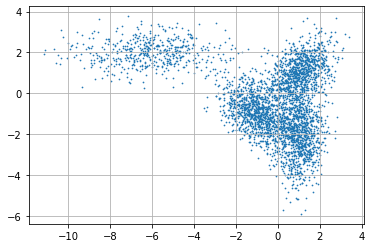

In [31]:
k_means_file = 'dataset1.csv'
agglomerative_file = 'dataset2.csv'

df = pd.read_csv(k_means_file)
df2 = pd.read_csv(agglomerative_file)

x,y = df['8.228429240780527065e-01'], df[' 1.135491058107753304e+00']
x2,y2,z = df2['-6.126607425458740153e+00'],df2[' 1.764511299313616988e+01'], df2[' 6.095543727848264481e+00']

plt.figure()
plt.grid(True)
plt.scatter(df['8.228429240780527065e-01'], df[' 1.135491058107753304e+00'],s=0.5)

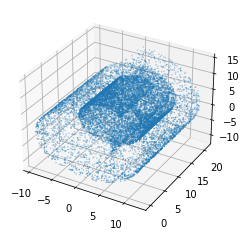

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df2['-6.126607425458740153e+00'],df2[' 1.764511299313616988e+01'], df2[' 6.095543727848264481e+00'], s=0.1)

## KMean with random centers

In [70]:
#Credit for code idea: https://regenerativetoday.com/develop-a-k-mean-clustering-algorithm-from-scratch-in-python-and-use-it-for-dimensional-reduction/
def init_clusters(k,data):
    initial_centers = random.sample(range(0,len(data)),k)
    centers = []

    for center in initial_centers:
        centers.append(data.loc[center])

    centers = np.array(centers)

    return centers

def diff(X1, X2):
    return np.sqrt(np.sum((X1-X2)**2))

def closestCenter(initialized,data):
    cluster = []
    for row in data:
        distance = []
        for center in initialized:
            distance.append(diff(row,center))
        cluster.append(np.argmin(distance))
    return cluster


def update_centers(rows_with_clusters):
    new_centers = []
    for c in set(rows_with_clusters['cluster']):
        curr_cluster = rows_with_clusters[rows_with_clusters['cluster'] == c][rows_with_clusters.columns[:-1]]
        cluster_mean = curr_cluster.mean(axis=0)
        new_centers.append(cluster_mean)
    return np.array(new_centers)

def find_cost(clustered_rows,k,centers,dataset):
    distance = []
    for clust in range(k):
        dist = 0
        if dataset == 1:
            for val in clustered_rows.itertuples():
                if (val[3] == clust):
                    point = np.array([val[1],val[2]])
                    cent = np.array(centers[clust])
                    dist += diff(point,cent) ** 4
            distance.append(dist)
        elif dataset == 2:
            for val in clustered_rows.itertuples():
                if (val[4] == clust):
                    point = np.array([val[1],val[2],val[3]])
                    cent = np.array(centers[clust])
                    dist += diff(point,cent) ** 4
            distance.append(dist)

        return sum(distance)

### Driver for KMeans
1. Dataset 1

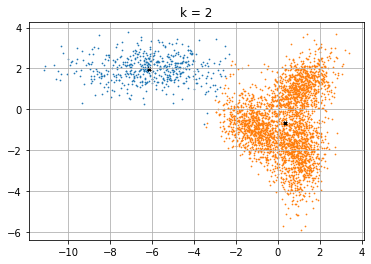

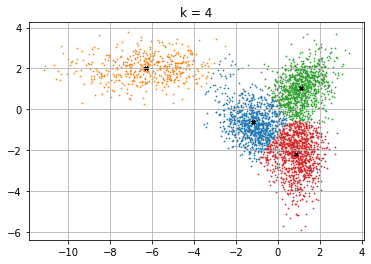

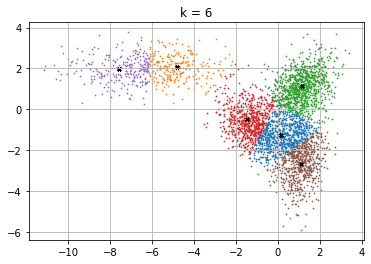

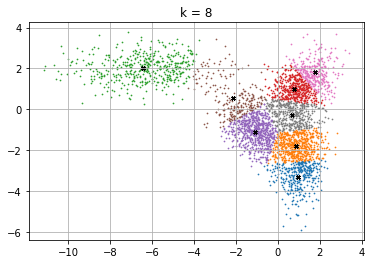

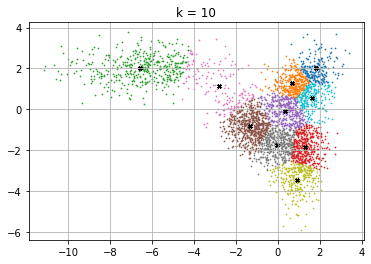

In [55]:
all_rows_dataset1 = []
cost_with_k = {}

for ind, row in df.iterrows():
    all_rows_dataset1.append((row['8.228429240780527065e-01'],row[' 1.135491058107753304e+00']))

for k in range(2,11,2):
    cost = []
    centers = init_clusters(k,df)

    for i in range(10):
        clustered = closestCenter(centers, all_rows_dataset1)
        rows_with_clusters = pd.concat([pd.DataFrame(all_rows_dataset1), pd.DataFrame(clustered, columns=['cluster'])], axis=1)
        centers = update_centers(rows_with_clusters)
        cost.append(find_cost(rows_with_clusters,k,centers,1))
    
    cost_with_k[k] = min(cost)
    plt.figure()
    plt.grid(True)
    for i in range(k):
        clust_col = rows_with_clusters.loc[rows_with_clusters['cluster'] == i]
        plt.title("k = " + str(k))
        plt.scatter(clust_col[0],clust_col[1],s=0.5)
        plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], color='black', marker='x', s=10)

#### Plotting K V/S Cost

[14259.705066088092, 808.2330547290546, 83.92741335320427, 435.78965127427307, 6.159017194332744]


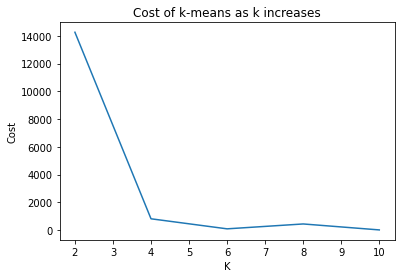

In [56]:
k_arr = list(cost_with_k.keys())
cost_arr = list(cost_with_k.values())

print(cost_arr)

plt.figure()
plt.title("Cost of k-means as k increases")
plt.xlabel("K")
plt.ylabel("Cost")
plt.plot(k_arr,cost_arr)     
plt.show()

2. Dataset 2

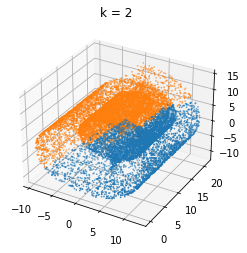

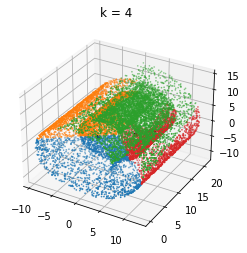

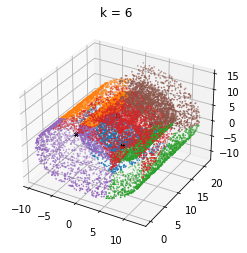

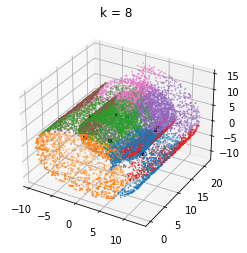

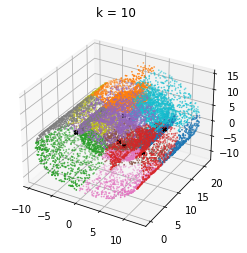

In [72]:
all_rows_dataset2 = []
cost_with_k_d2 = {}

for ind, row in df2.iterrows():
    all_rows_dataset2.append((row['-6.126607425458740153e+00'],row[' 1.764511299313616988e+01'], row[' 6.095543727848264481e+00']))

for k in range(2,11,2):
    cost = []
    centers = init_clusters(k,df2)

    for i in range(10):
        clustered = closestCenter(centers, all_rows_dataset2)
        rows_with_clusters = pd.concat([pd.DataFrame(all_rows_dataset2), pd.DataFrame(clustered, columns=['cluster'])], axis=1)
        centers = update_centers(rows_with_clusters)
        cost.append(find_cost(rows_with_clusters,k,centers,2))
    
    cost_with_k_d2[k] = min(cost)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        clust_col = rows_with_clusters.loc[rows_with_clusters['cluster'] == i]
        plt.title("k = " + str(k))
        sc = ax.scatter(clust_col[0],clust_col[1],clust_col[2],s=0.5)
        sc = ax.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], color='black', marker='x', s=10)

#### Plotting K V/S Cost

[103884958.70376444, 66725138.31531093, 14165443.028644532, 3257529.6832113764, 1225767.2893271938]


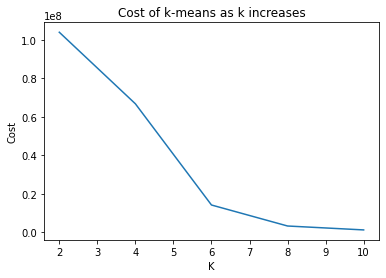

In [78]:
k_arr = list(cost_with_k_d2.keys())
cost_arr = list(cost_with_k_d2.values())

print(cost_arr)

plt.figure()
plt.title("Cost of k-means as k increases")
plt.xlabel("K")
plt.ylabel("Cost")
plt.plot(k_arr,cost_arr)     
plt.show()

## KMeans with K++
#### K++ for dataset1

In [38]:
# Credit for code idea: https://medium.com/geekculture/implementing-k-means-clustering-with-k-means-initialization-in-python-7ca5a859d63a
def k_mean_plus(data,k):
    initial_center = data.sample()
    centeroid = 1

    while centeroid != k:
        max_dist = [0,0]
        for index, row in initial_center.iterrows():
            distance = np.sqrt((data["8.228429240780527065e-01"] - row["8.228429240780527065e-01"])**2 
                        +(data[" 1.135491058107753304e+00"] - row[" 1.135491058107753304e+00"])**2)
            if max(distance) > max(max_dist):
                max_dist = distance

        data = pd.concat([data,max_dist], axis = 1)
        index = data.iloc[:,centeroid+1].idxmax()
        max_coor = pd.DataFrame(data.iloc[index][["8.228429240780527065e-01", " 1.135491058107753304e+00"]]).T
        initial_center = pd.concat([initial_center,max_coor])
        data = data.drop(index)
        centeroid += 1

    return initial_center

#### K++ for dataset 2

In [79]:
# Credit for code idea: https://medium.com/geekculture/implementing-k-means-clustering-with-k-means-initialization-in-python-7ca5a859d63a
def k_mean_plus_d2(data,k):
    initial_center = data.sample()
    centeroid = 1
# df2['-6.126607425458740153e+00'],df2[' 1.764511299313616988e+01'], df2[' 6.095543727848264481e+00']
    while centeroid != k:
        max_dist = [0,0]
        for index, row in initial_center.iterrows():
            distance = np.sqrt((data["-6.126607425458740153e+00"] - row["-6.126607425458740153e+00"])**2 
                +(data[" 1.764511299313616988e+01"] - row[" 1.764511299313616988e+01"])**2 
                +(data[" 6.095543727848264481e+00"] - row[" 6.095543727848264481e+00"])**2)
            if max(distance) > max(max_dist):
                max_dist = distance

        data = pd.concat([data,max_dist], axis = 1)
        index = data.iloc[:,centeroid+1].idxmax()
        max_coor = pd.DataFrame(data.iloc[index][["-6.126607425458740153e+00", " 1.764511299313616988e+01", " 6.095543727848264481e+00"]]).T
        initial_center = pd.concat([initial_center,max_coor])
        data = data.drop(index)
        centeroid += 1

    return initial_center

#### Driver for KMeans++
1. Dataset 1

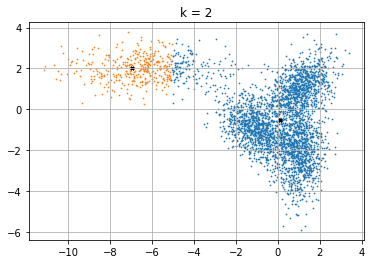

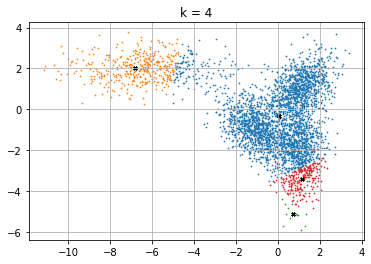

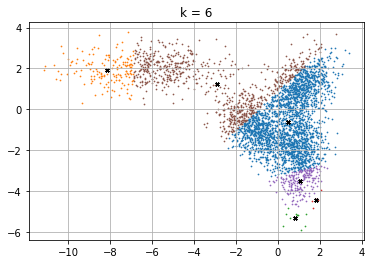

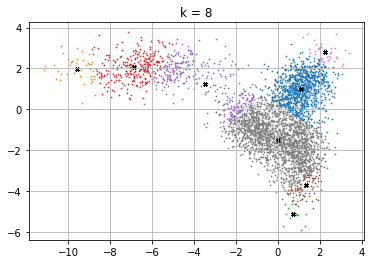

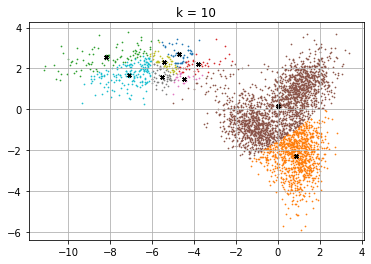

In [59]:
cost_with_k = {}

for k in range(2,11,2):
    cost = []
    centers_plus = k_mean_plus(df,k)
    centers_plus = np.array(centers_plus)

    for i in range(10):
        clustered = closestCenter(centers_plus, all_rows_dataset1)
        rows_with_clusters = pd.concat([pd.DataFrame(all_rows_dataset1), pd.DataFrame(clustered, columns=['cluster'])], axis=1)
        centers = update_centers(rows_with_clusters)
        cost.append(find_cost(rows_with_clusters,k,centers,1))
    
    cost_with_k[k] = min(cost)
    plt.figure()
    plt.grid(True)
    for i in range(k):
        clust_col = rows_with_clusters.loc[rows_with_clusters['cluster'] == i]
        plt.title("k = " + str(k))
        plt.scatter(clust_col[0],clust_col[1],s=0.5)
        plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], color='black', marker='x', s=10)

#### Plotting K V/S Cost

[187139.37327095168, 119664.08766371295, 34787.9607617496, 1711.9193914108844, 6.710949303712788]


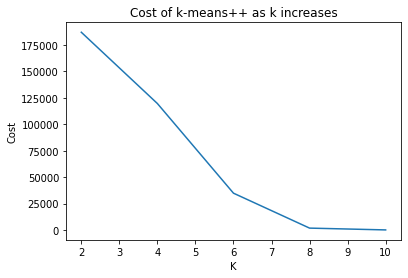

In [60]:
k_arr = list(cost_with_k.keys())
cost_arr = list(cost_with_k.values())

print(cost_arr)

plt.figure()
plt.title("Cost of k-means++ as k increases")
plt.xlabel("K")
plt.ylabel("Cost")
plt.plot(k_arr,cost_arr)     
plt.show()

2. Dataset 2

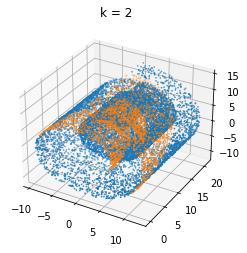

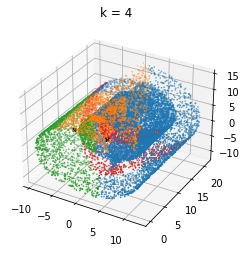

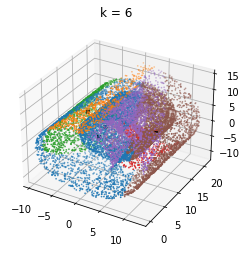

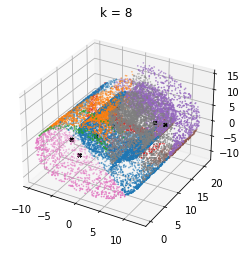

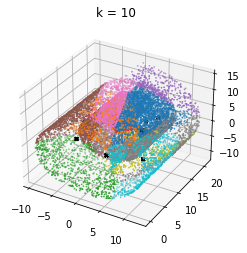

In [80]:
cost_with_k_d2 = {}

for k in range(2,11,2):
    cost = []
    centers_plus = k_mean_plus_d2(df2,k)
    centers_plus = np.array(centers_plus)

    for i in range(10):
        clustered = closestCenter(centers_plus, all_rows_dataset2)
        rows_with_clusters = pd.concat([pd.DataFrame(all_rows_dataset2), pd.DataFrame(clustered, columns=['cluster'])], axis=1)
        centers = update_centers(rows_with_clusters)
        cost.append(find_cost(rows_with_clusters,k,centers,2))
    
    cost_with_k_d2[k] = min(cost)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        clust_col = rows_with_clusters.loc[rows_with_clusters['cluster'] == i]
        plt.title("k = " + str(k))
        sc = ax.scatter(clust_col[0],clust_col[1],clust_col[2],s=0.5)
        sc = ax.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], color='black', marker='x', s=10)

#### Plotting K V/S Cost

[128002845.45311695, 62189055.54468577, 36241834.33359688, 32000955.74532771, 2936198.2983603566]


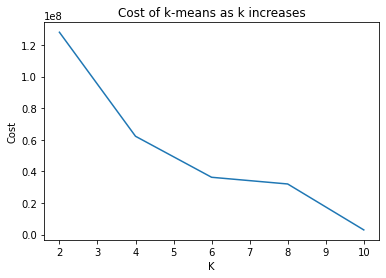

In [81]:
k_arr = list(cost_with_k_d2.keys())
cost_arr = list(cost_with_k_d2.values())

print(cost_arr)

plt.figure()
plt.title("Cost of k-means as k increases")
plt.xlabel("K")
plt.ylabel("Cost")
plt.plot(k_arr,cost_arr)     
plt.show()

## Agglomerative Clustering
1. Dataset 1

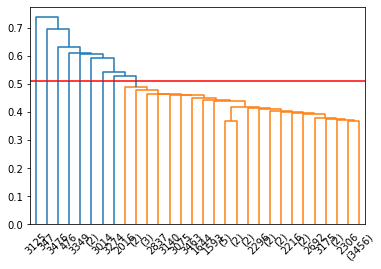

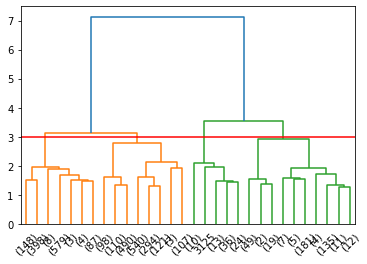

In [66]:
Z1 = shc.linkage(df, 'single')
plt.figure()
dn = shc.dendrogram(Z1, truncate_mode = "lastp")
dn = plt.axhline(y=0.5125, color='r', linestyle='-')
k_dataset1_single = 9 #counted manually

Z1_avg = shc.linkage(df, 'average')
plt.figure()
dn = shc.dendrogram(Z1_avg, truncate_mode = "lastp")
dn = plt.axhline(y=3, color='r', linestyle='-')
k_dataset1_average = 4 #counted manually

- Single Linkage

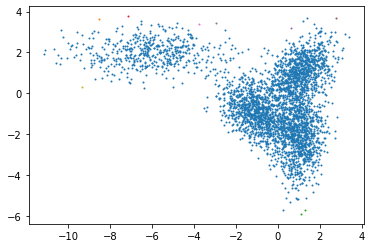

In [67]:
all_rows_dataset1_agglo = []

for ind, row in df.iterrows():
    all_rows_dataset1_agglo.append((row['8.228429240780527065e-01'],row[' 1.135491058107753304e+00']))

clustering_dataset1_single = AgglomerativeClustering(n_clusters=k_dataset1_single, linkage="single").fit(df)
rows_with_clusters_agglo = pd.concat([pd.DataFrame(all_rows_dataset1_agglo), pd.DataFrame(np.array(clustering_dataset1_single.labels_), columns=['cluster'])], axis=1)

for i in range(k_dataset1_single):
    clust_col_plus_agglo = rows_with_clusters_agglo.loc[rows_with_clusters_agglo['cluster'] == i]
    plt.scatter(clust_col_plus_agglo[0],clust_col_plus_agglo[1],s=1)


- Average Linkage

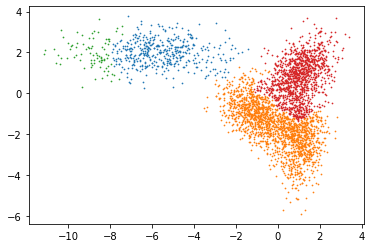

In [68]:
clustering_dataset1_average = AgglomerativeClustering(n_clusters=k_dataset1_average, linkage="average").fit(df)
rows_with_clusters_agglo = pd.concat([pd.DataFrame(all_rows_dataset1_agglo), pd.DataFrame(np.array(clustering_dataset1_average.labels_), columns=['cluster'])], axis=1)

for i in range(k_dataset1_average):
    clust_col_plus_agglo = rows_with_clusters_agglo.loc[rows_with_clusters_agglo['cluster'] == i]
    plt.scatter(clust_col_plus_agglo[0],clust_col_plus_agglo[1],s=0.5)


2. Dataset 2

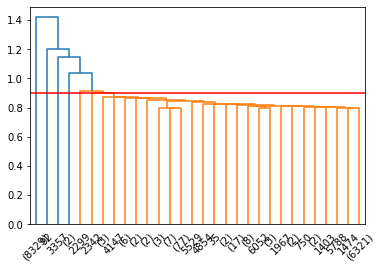

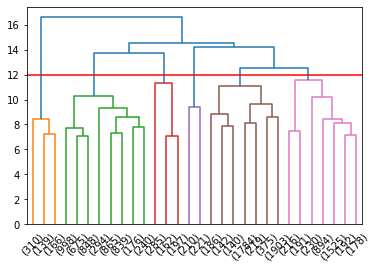

In [83]:
Z2 = shc.linkage(df2, 'single')
plt.figure()
dn = shc.dendrogram(Z2, truncate_mode = "lastp")
dn = plt.axhline(y=0.9, color='r', linestyle='-')
k_dataset2_single = 7 #counted manually

Z2_avg = shc.linkage(df2, 'average')
plt.figure()
dn = shc.dendrogram(Z2_avg, truncate_mode = "lastp")
dn = plt.axhline(y=12, color='r', linestyle='-')
k_dataset2_average = 6 #counted manually

- Single Linkage

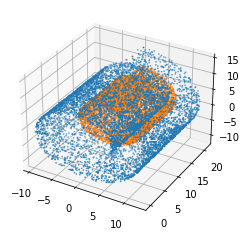

In [84]:
all_rows_dataset2_agglo = []

for ind, row in df2.iterrows():
    all_rows_dataset2_agglo.append((row['-6.126607425458740153e+00'],row[' 1.764511299313616988e+01'], row[' 6.095543727848264481e+00']))

clustering_dataset2_single = AgglomerativeClustering(n_clusters=k_dataset2_single, linkage="single").fit(df2)
rows_with_clusters_agglo2 = pd.concat([pd.DataFrame(all_rows_dataset2_agglo), pd.DataFrame(np.array(clustering_dataset2_single.labels_), columns=['cluster'])], axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(k_dataset2_single):
    clust_col = rows_with_clusters_agglo2.loc[rows_with_clusters_agglo2['cluster'] == i]
    sc = ax.scatter(clust_col[0],clust_col[1],clust_col[2],s=0.5)



- Average Linkage

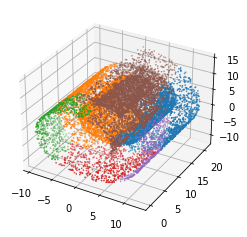

In [85]:
clustering_dataset2_average = AgglomerativeClustering(n_clusters=k_dataset2_average, linkage="average").fit(df2)
rows_with_clusters_agglo2 = pd.concat([pd.DataFrame(all_rows_dataset2_agglo), pd.DataFrame(np.array(clustering_dataset2_average.labels_), columns=['cluster'])], axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(k_dataset2_average):
    clust_col = rows_with_clusters_agglo2.loc[rows_with_clusters_agglo2['cluster'] == i]
    sc = ax.scatter(clust_col[0],clust_col[1],clust_col[2],s=0.5)